In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Data.csv")

In [ ]:
data.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN


In [ ]:
#avg sales and then highest

In [ ]:
dates=data.groupby('Date')['Final Total'].mean().sort_values(ascending=False)
dates


,Final Total
Date,
2023-07-19,319.837857
2023-07-17,270.496410
2023-07-15,247.183810
2023-07-21,240.761176
2023-07-11,235.608519
...,...
2023-09-14,127.006889
2023-07-02,126.681354
2023-09-04,125.935918


In [ ]:
#how many total bills are there
total_bills=data.groupby('Invoice No.')['Invoice No.'].count()
total_bills
print(len(total_bills))

2199


In [ ]:
#or use nunique
unique_count=data['Invoice No.'].nunique()
unique_count

2199

In [ ]:
#september month top sale
sold_items=data[(data['Date']>='2023-09-01') & (data['Date']<='2023-09-30')]
top_sale=sold_items.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head(1)
top_sale

,Qty.
Item Name,
Chicken Biriyani With Raitha And Gravy,268.0


In [ ]:
#july month least sols 3items
sold_items1=data[(data['Date']>='2023-07-01') & (data['Date']<='2023-07-30')]
least_sold=sold_items1.groupby('Category')['Qty.'].sum().sort_values(ascending=True).head(3)
least_sold

,Qty.
Category,
NON VEG STARTERS FISH,47.0
NON VEG STARTERS EGG,53.0
Veg Soup,53.0


<BarContainer object of 3 artists>

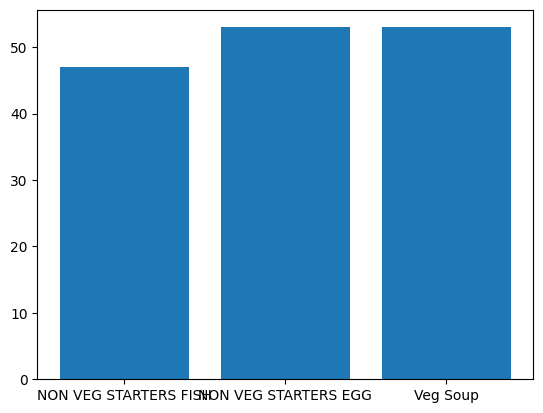

In [ ]:
plt.bar(least_sold.index,least_sold.values)

Category
Deserts & Mocktails          51517.47
Indian Breads               117623.56
NON VEG BRIYANI & RICE      379502.88
NON VEG STARTERS CHICKEN    190550.96
NON VEG STARTERS EGG          7272.36
NON VEG STARTERS FISH        37488.48
NON VEG STARTERS MUTTON        250.96
Non Veg Gravy               122743.76
Non Veg Soup                 27721.66
Non Veg Tandoor              51633.04
Non Veg combos                6857.56
VEG BIRYANI & RICE           93072.70
Veg Gravy                    54492.10
Veg Soup                      9581.88
Veg Starters                 57827.22
Name: Final Total, dtype: float64


([<matplotlib.patches.Wedge at 0x7f27415e7110>,
 [Text(1.09014424940389, 0.14692009900496789, ''),
  Text(0.9238335181233556, 0.5971026970227347, ''),
  Text(-0.32055500779691326, 1.0522568540885449, ''),
  Text(-1.076459564631158, -0.22635106740216174, ''),
  Text(-0.8257766321051537, -0.7267000439445905, ''),
  Text(-0.7357962178533227, -0.8176820444358223, ''),
  Text(-0.6521406930442466, -0.8858400061386761, ''),
  Text(-0.34055628103040037, -1.0459547884353049, ''),
  Text(0.08406318546201783, -1.0967831968306128, ''),
  Text(0.306999147172038, -1.056291400909636, ''),
  Text(0.4634947905711492, -0.9975833695052292, ''),
  Text(0.7042537144225388, -0.8450010093023897, ''),
  Text(0.9693853638956355, -0.5198961591173056, ''),
  Text(1.0421835670809914, -0.3519281354287279, ''),
  Text(1.0875868273780112, -0.1647874173407426, '')])

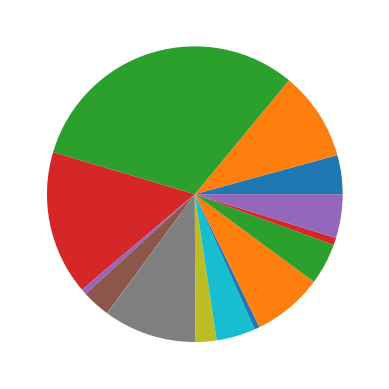

In [ ]:
#pie chart for sales by category
sales=data.groupby('Category')['Final Total'].sum()
print(sales)
plt.pie(sales)


In [ ]:
#what is AOV of the restaurant(average order value)
unique_invoises=data['Invoice No.'].nunique()
total_sales=data['Final Total'].sum()
averege=total_sales/unique_invoises
averege

np.float64(549.4027239654388)